* Delivery_time -> Predict delivery time using sorting time
* Salary_hike -> Build a prediction model for Salary_hike
* Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


# Delivery Time Dataset

In [2]:
# importing dataset
df= pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#Renaming column
dataset=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization


In [4]:
# Data Description
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


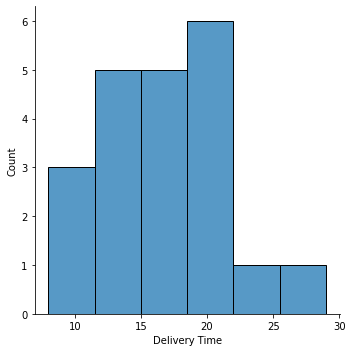

In [5]:
# Data Distribution
sns.displot(df['Delivery Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

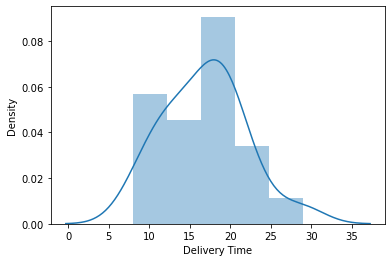

In [6]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['Delivery Time'])


In [7]:
# Corellation Analysis.
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

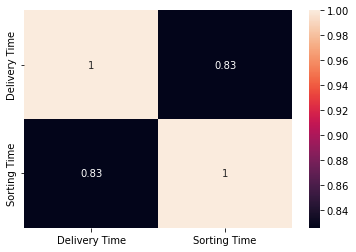

In [8]:
sns.heatmap(df.corr(),annot = True) # annot is use to give the values e.g. 0.83 , 1

<AxesSubplot:xlabel='Delivery Time', ylabel='Sorting Time'>

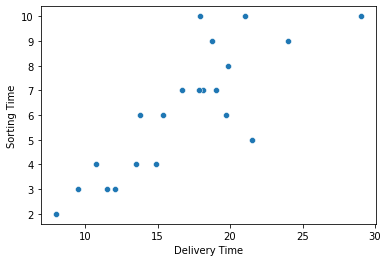

In [9]:
#Scatter plot
sns.scatterplot(df['Delivery Time'],df['Sorting Time'])

Text(0.5, 1.0, 'Log-Transformed Data')

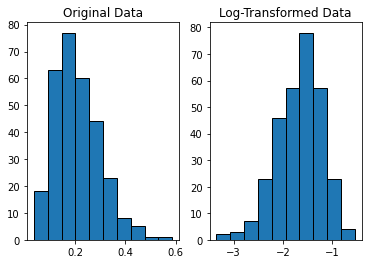

In [10]:
##--LOG TRANSFORMATION--##

#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
df = np.random.beta(a=4, b=15, size=300)

#create log-transformed data
data_log = np.log(df)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')


Text(0.5, 1.0, 'Square Root Transformed Data')

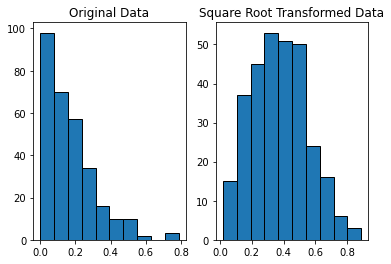

In [11]:
##--SQUARE-ROOT TRANSPORMMATION--##

#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
df = np.random.beta(a=1, b=5, size=300)

#create log-transformed data
data_log = np.sqrt(df)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(df, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

In [12]:
#Renaming column
df = pd.DataFrame(dataset)
df = df.rename(columns={'Delivery Time':'delivery_time','Sorting Time':'sorting_time'})
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
model = smf.ols('delivery_time~sorting_time', data=dataset).fit()   #fit is used  to fit the data to M.L. algorithm

In [14]:
model

In [15]:
# Regression plot

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

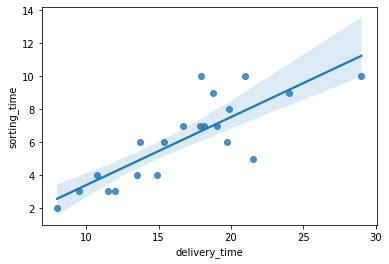

In [16]:
sns.regplot(dataset['delivery_time'],dataset['sorting_time'])

In [17]:
# Model Parameters

In [18]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [19]:
#Line equation
y = (1.64)*5+6.58  # 300 value is taken randomly
y

14.78

In [20]:
#Print values for t value and p value


print(f"The t value is {model.tvalues}\n p-value is {model.pvalues}")

The t value is Intercept       3.823349
sorting_time    6.387447
dtype: float64
 p-value is Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [21]:
# r2 value

print(model.rsquared, model.rsquared_adj)

0.6822714748417231 0.6655489208860244


# Prediction For new Data

In [22]:
new_data=pd.Series([5,7,9])
new_data

0    5
1    7
2    9
dtype: int64

In [23]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,7
2,9


In [24]:
model.predict(data_pred)

0    14.827833
1    18.125873
2    21.423913
dtype: float64

# Salary Dataset

In [25]:
# Importing DataSet
data1 =  pd.read_csv('Salary_Data.csv')
data1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data Visualization

In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [27]:
dataset.shape

(21, 2)

In [28]:
dataset.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Salary', ylabel='Density'>

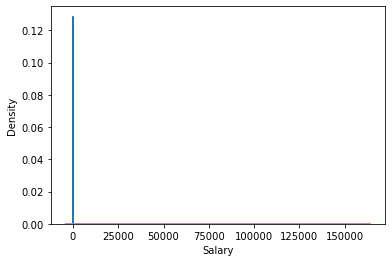

In [29]:
sns.distplot(data1['YearsExperience'])
sns.distplot(data1['Salary'])

In [30]:
#Renaming column
dataset1=data1.rename({'YearsExperience':'Experience in year'},axis=1)
dataset1

,Experience in year,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [31]:
dataset1.corr()

,Experience in year,Salary
Experience in year,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='Experience in year', ylabel='Salary'>

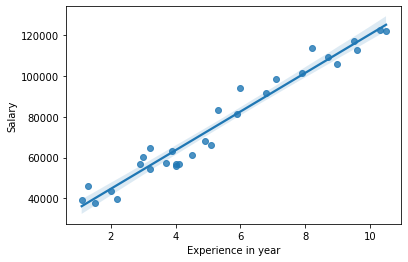

In [32]:
sns.regplot(x=dataset1['Experience in year'],y=dataset1['Salary'])

In [33]:
#Model Building
model1=smf.ols("Salary~YearsExperience",data=data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        15:18:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#model testing
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [35]:
#finding tvalue pvalue
model1.tvalues,model1.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [36]:
#finding rsquared value
model1.rsquared,model1.rsquared_adj


(0.9569566641435086, 0.9554194021486339)

In [37]:
#model prediction
Salary=(25792.200199)+(9449.962321)*(3)
Salary

54142.087162

In [38]:
New_data=pd.Series([5,8])

In [39]:
New_data

0    5
1    8
dtype: int64

In [40]:
data1_pred=pd.DataFrame(New_data,columns=['YearsExperience'])
data1_pred

,YearsExperience
0,5
1,8


<AxesSubplot:>

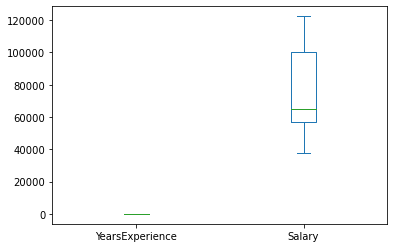

In [41]:
data1.plot.box()

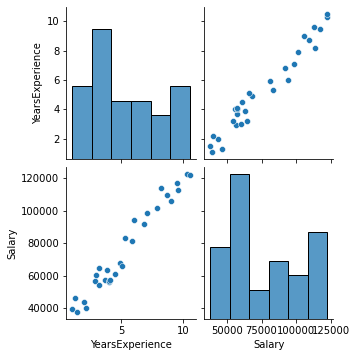

In [42]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
#positve correlation
sns.pairplot(data1)    

In [43]:
#EDA
import pandas as pd 
X = data1.iloc[:, 1:2].values
y = data1.iloc[:, 1].values

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train  = sc_X.fit_transform(X_train)
X_test  = sc_X.fit_transform(X_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier()

Classifier.fit(X_train,y_train)

y_pred = Classifier.predict(X_test)
print(y_test)
print(y_pred)

[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.]
[ 39343. 101302.  54445.  56957.  98273.  91738.  93940.  54445.]


In [46]:
# Fitting Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

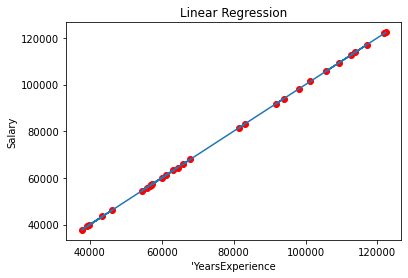

In [47]:
#  Visualize Linear Regression Results
import matplotlib.pyplot as plt

plt.scatter(X,y, color="red")
plt.plot(X, lin_reg.predict(X))
plt.title("Linear Regression")
plt.xlabel("'YearsExperience")
plt.ylabel("Salary")
plt.show()

In [48]:
X=data1['Salary'].values.reshape(-1,1)
print(X)
Y=data1['YearsExperience'].values.reshape(-1,1)
print(Y)

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


<Figure size 1080x720 with 0 Axes>

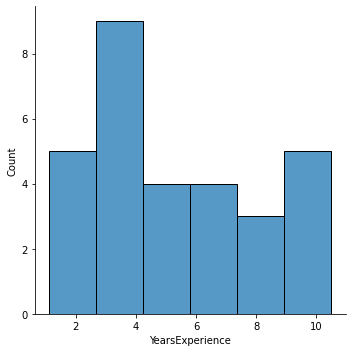

In [49]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.displot(data1['YearsExperience'])
plt.show()

Text(0.5, 1.0, 'Log-Transformed Data')

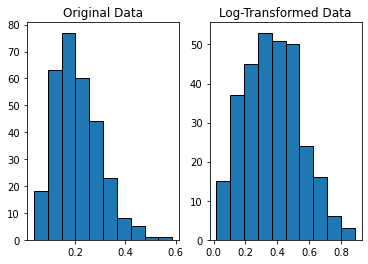

In [50]:
##-- LOG TRANSFORMATION--##

import numpy as np
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
data1 = np.random.beta(a=4, b=15, size=300)

#create log-transformed data
data1_log = np.log(data1)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data1, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')


Text(0.5, 1.0, 'Square Root Transformed Data')

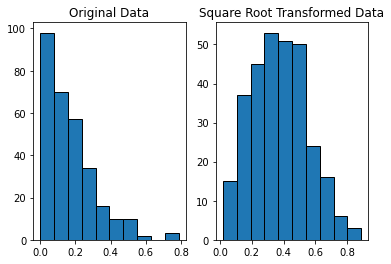

In [51]:
##-SQUARE ROOT TRANSFORMATION--##

import numpy as np
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
data1 = np.random.beta(a=1, b=5, size=300)

#create log-transformed data
data1_log = np.sqrt(data1)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data1, edgecolor='black')
axs[1].hist(data1_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')